In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleaned_data.csv')
df

,CustomerID,Month Of Interaction,New/Old Customer,Referral sources,Clothing Section,Journey Stage,Touchpoints,Actions,Outcomes,Sales Campaign,Feedback Rating,Channels,ProductID,Product Name,Product Category,Total Amount (in Rs)
0,2,January,Old Customer,Social Media Influencer,Men,Purchase,Website,Made Purchase,Purchased,Winter Collection,2,Online,1001.0,Tshirt,Topwear,690.0
1,4,January,New Customer,Friends/Family,Men,Awareness,Website,Viewed Product,Continued Browsing,Winter Collection,9,Online,NaN,NaN,NaN,NaN
2,5,January,New Customer,Friends/Family,Men,Purchase,Social Media,Added to Cart,Purchased,Winter Collection,5,Online,1003.0,Shoes,Footwear,3325.0
3,16,January,New Customer,Friends/Family,Men,Purchase,Social Media,Made Purchase,Purchased,New Arrivals,1,Online,1013.0,Pants,Bottomwear,3045.0
4,18,January,Old Customer,Advertisement,Men,Awareness,E-Commerce,Viewed Product,Continued Browsing,Winter Collection,10,Online,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,239,April,Old Customer,Advertisement,Kids,Awareness,Website,Viewed Product,Continued Browsing,New Arrivals,6,Online,NaN,NaN,NaN,NaN
246,241,April,New Customer,Advertisement,Kids,Awareness,Website,Viewed Product,Continued Browsing,Summer Collection,7,Online,NaN,NaN,NaN,NaN
247,245,April,New Customer,Social Media Influencer,Women,Awareness,Social Media,Viewed Product,Continued Browsing,Summer Collection,8,Online,NaN,NaN,NaN,NaN
248,248,April,Old Customer,Advertisement,Women,Consideration,Website,Added to Cart,Continued Browsing,New Arrivals,8,Online,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            250 non-null    int64  
 1   Month Of Interaction  250 non-null    object 
 2   New/Old Customer      250 non-null    object 
 3   Referral sources      250 non-null    object 
 4   Clothing Section      250 non-null    object 
 5   Journey Stage         250 non-null    object 
 6   Touchpoints           250 non-null    object 
 7   Actions               250 non-null    object 
 8   Outcomes              250 non-null    object 
 9   Sales Campaign        250 non-null    object 
 10  Feedback Rating       250 non-null    int64  
 11  Channels              250 non-null    object 
 12  ProductID             115 non-null    float64
 13  Product Name          115 non-null    object 
 14  Product Category      115 non-null    object 
 15  Total Amount (in Rs)  1

# Total Customer Interactions By Month(2024)

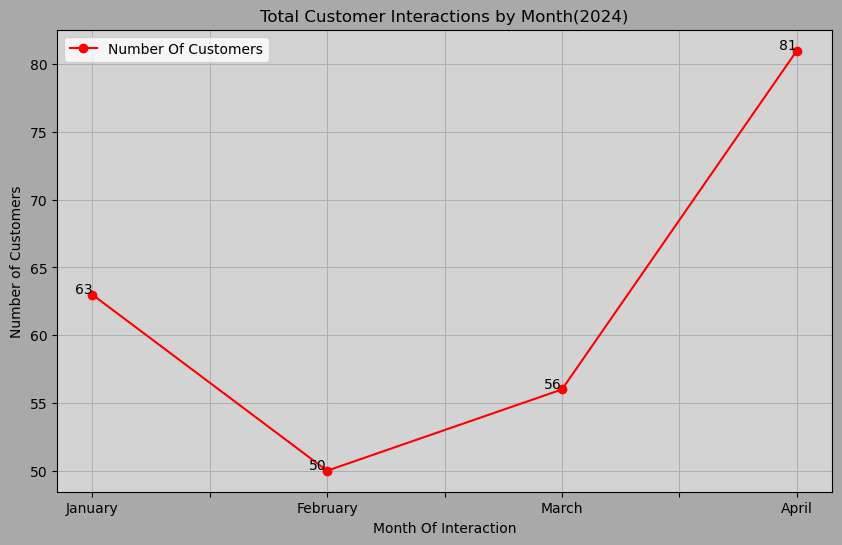

In [4]:
months_order = ['January', 'February', 'March', 'April']
df['Month Of Interaction'] = pd.Categorical(df['Month Of Interaction'], categories=months_order, ordered=True)

x=df.groupby('Month Of Interaction').count()['CustomerID']
fig=plt.figure(figsize=(10,6),facecolor='darkgray')
ax = fig.add_subplot(111)
ax.set_facecolor('lightgrey')
x.plot(ax=ax,kind='line',title="Total Customer Interactions by Month(2024)", marker='o',color='red')
plt.xlabel('Month Of Interaction')
plt.ylabel('Number of Customers')
plt.legend(['Number Of Customers'])
for i, value in enumerate(x):
    plt.text(i, value + 0.1, str(value), ha='right')
plt.grid()
plt.show()

# Total Customer Interactions in Different Journey Stages

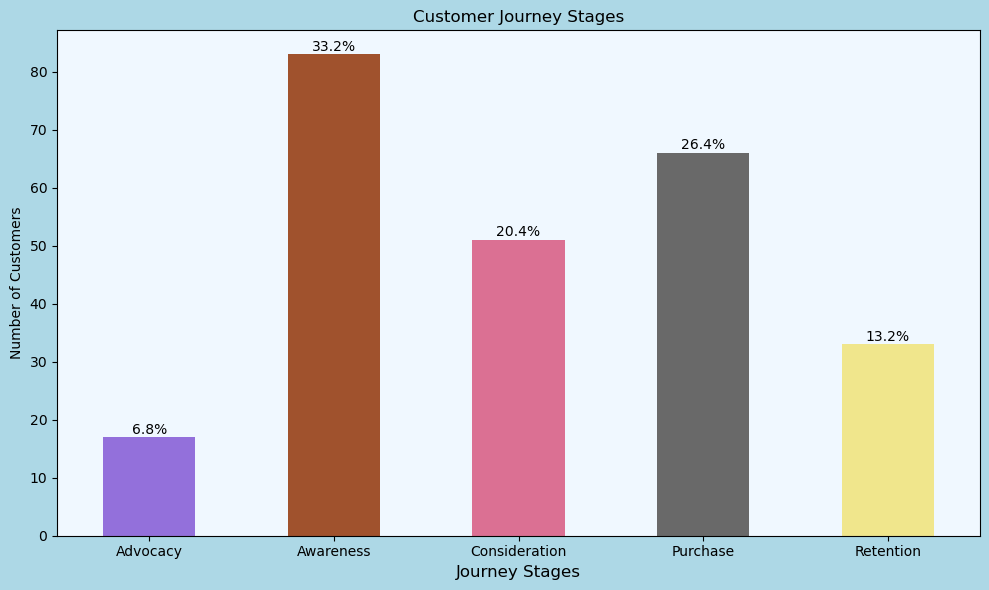

In [5]:
x = df.groupby('Journey Stage').count()['CustomerID']

fig = plt.figure(figsize=(10, 6), facecolor='lightblue')
ax = fig.add_subplot(111)
ax.set_facecolor('aliceblue')
bars = x.plot(kind='bar', title="Customer Journey Stages", color=['mediumpurple', 'sienna', 'palevioletred', 'dimgray', 'khaki'])
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{height / sum(x) * 100:.1f}%", ha='center', va='bottom')

plt.xticks(rotation=0)
plt.xlabel('Journey Stages', fontsize=12)
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# How are the customers engaging with the brand? - Customer Journey Touchpoints

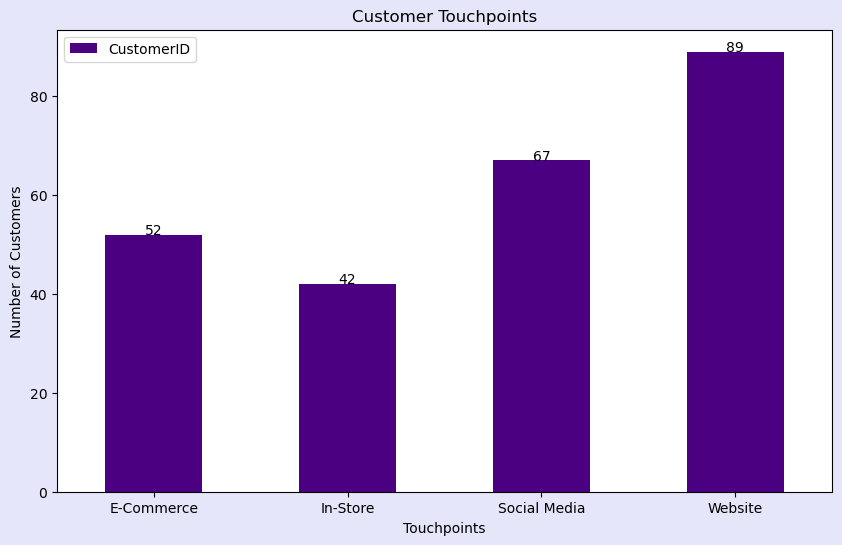

In [6]:
x=df.groupby('Touchpoints').count()['CustomerID']
plt.figure(figsize=(10,6),facecolor='lavender')
x.plot(kind='bar',title="Customer Touchpoints",color='indigo')
plt.xticks(rotation=0)
plt.xlabel('Touchpoints')
plt.ylabel('Number of Customers')
plt.legend()
for i, value in enumerate(x):
    plt.text(i, value + 0.1, str(value), ha='center')
plt.show()

# Total Customer Interactions in Different Clothing Sections

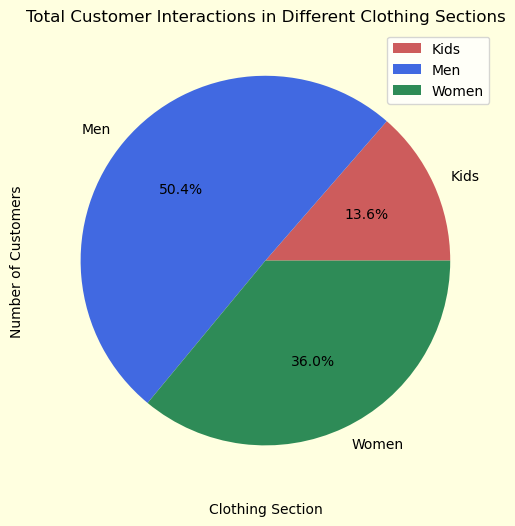

In [7]:
x=df.groupby('Clothing Section').count()['CustomerID']
plt.figure(figsize=(10,6),facecolor='lightyellow')
x.plot(kind='pie',title="Total Customer Interactions in Different Clothing Sections",autopct='%.1f%%',colors=['indianred','royalblue','seagreen'])
plt.xlabel('Clothing Section')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

# Who are buying the products more - New Customers or Existing Customers?

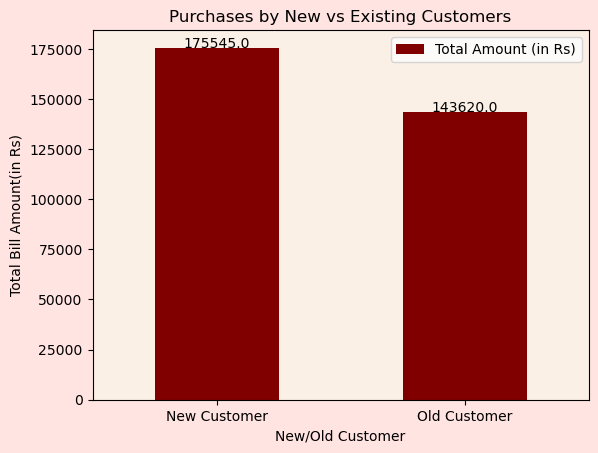

In [8]:
x=df.groupby('New/Old Customer').sum()['Total Amount (in Rs)']
fig=plt.figure(facecolor='mistyrose')
ax = fig.add_subplot(111)
ax.set_facecolor('linen')
x.plot(kind='bar',title="Purchases by New vs Existing Customers",color='maroon')
plt.xticks(rotation=0)
plt.xlabel('New/Old Customer')
plt.ylabel('Total Bill Amount(in Rs)')
plt.legend()
for i, value in enumerate(x):
    plt.text(i, value + 0.1, str(value), ha='center')
plt.show()

# Which referral sources have boosted up the sales?

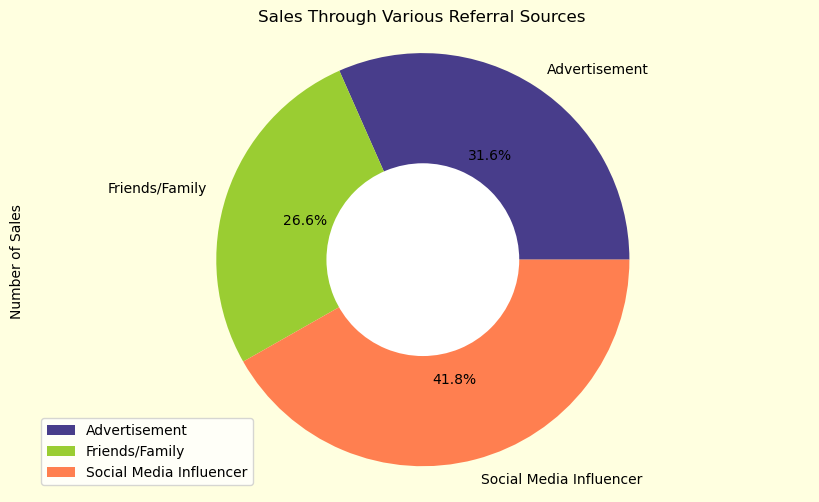

In [9]:
x=df.groupby('Referral sources').sum()['Total Amount (in Rs)']
plt.figure(figsize=(10, 6), facecolor='lightyellow')
outer = plt.pie(x, labels=x.index, autopct='%.1f%%', colors=['darkslateblue', 'yellowgreen', 'coral'], radius=1.5)
inner = plt.pie([1], colors=['white'], radius=0.7)
center_circle = plt.Circle((0, 0), 0.5, color='white', fc='white', linewidth=0)
plt.gca().add_artist(center_circle)
plt.title("Sales Through Various Referral Sources")
plt.ylabel('Number of Sales')
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

# Which product category has the most number of sales during different sales campaigns?

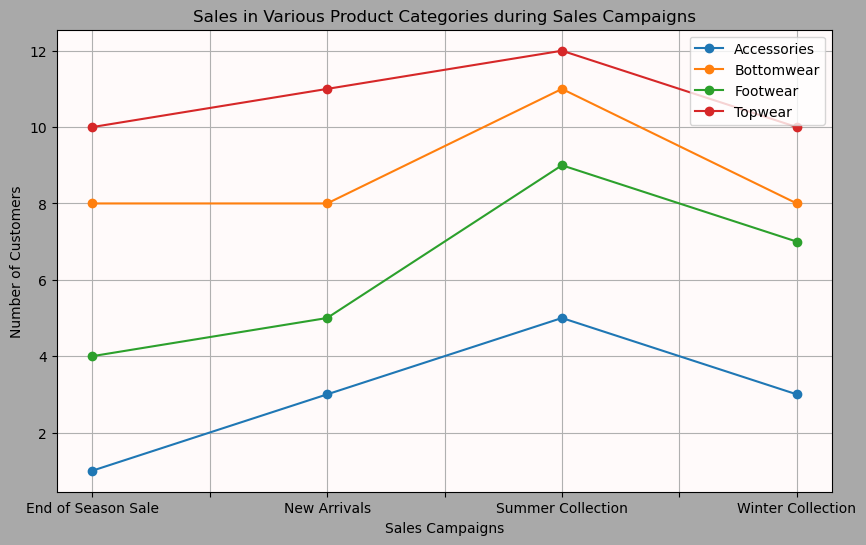

In [10]:
x= df.pivot_table(index='Sales Campaign', columns='Product Category', values='ProductID', aggfunc='count')
fig=plt.figure(figsize=(10,6),facecolor='darkgray')
ax = fig.add_subplot(111)
ax.set_facecolor('snow')
x.plot(ax=ax,kind='line',title="Sales in Various Product Categories during Sales Campaigns",marker='o')
plt.xticks(rotation=0)
plt.xlabel('Sales Campaigns')
plt.ylabel('Number of Customers')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# At a rate of 1 to 10, how satisfied are customers with their interaction with the brand?

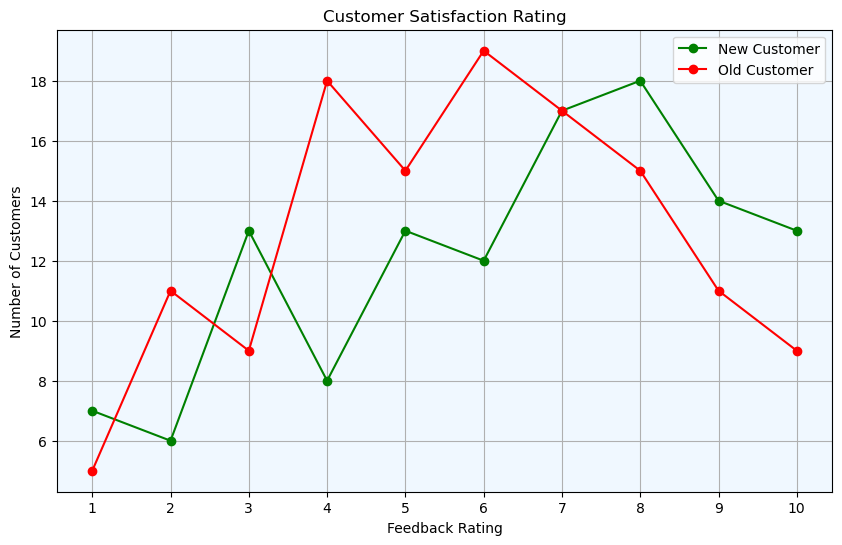

In [11]:
x= df.pivot_table(index='Feedback Rating', columns='New/Old Customer', values='CustomerID', aggfunc='count')
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_facecolor('aliceblue')
x.plot(ax=ax,kind='line',title="Customer Satisfaction Rating",marker='o',color=['green','red'])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Feedback Rating')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid()
plt.show()

# Insights From Data

Now we are going to summarize the key findings from our analysis.

- Since the beginning of 2024, there were maximum number of customer interactions in the month of April.
- 33.2% of the total customers exited at the awareness stage after viewing the product where they got to learn about the brand.
- Approx 46.4% in total actually developed interest in buying the product. Seeing the breakdown of this percentage, 26.4% left at the purchase stage, 13.2% decided to continue their purchase journey with the product in future and posted a review and 6.8% customers recommended the product to others and gave them a referral.
- There were maximum number of customer interactions through the website and social media. It is clear that there were more number of customer interactions through online channels than the offline stores.
- The Men's section is the most popular clothing section with around half of the customers interacting individually with the Men's section.
- It is also observable that the new customers really liked the products and spent more on products than the existing customers.
- Social Media being so popular among the youth these days has been the best marketing source as the maximum number of customers interacting with the brand got to know about it through social media influencers who are promoting and collaborating with the brand.
- The customers really liked the Summer Collection in all the four product categories. There were maximum number of sales through Topwears and Bottomwears.
- The new customers were quite well satisfied with their overall experience and most of the new customers gave an average rating of around 8. On the other hand, the old customers gave an average rating of 6 which means they were a little disappointed with the overall experience. 